# TFIDF

The TF-IDF of a term is calculated by multiplying TF and IDF scores. Translated into plain English, importance of a term is high when it occurs a lot in a given document and rarely in others. In short, commonality within a document measured by TF is balanced by rarity between documents measured by IDF.

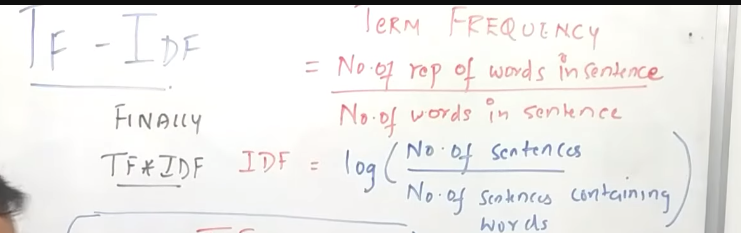

In [1]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from paragraph import paragraph

In [2]:
ps = PorterStemmer()
wordnet = WordNetLemmatizer()
sentences = nltk.sent_tokenize(paragraph)
corpus_stem = []
corpus_wordnet = []
for i in range(len(sentences)):
    review = re.sub('[^a-zA-Z]', ' ', sentences[i])
    review = review.lower()
    review = review.split()
    stemming = [ps.stem(word) for word in review if not word in set(stopwords.words("english"))]
    lemma = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words("english"))]
    stemming = " ".join(stemming)
    lemma = " ".join(lemma)
    corpus_stem.append(stemming)
    corpus_wordnet.append(lemma)

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_stem = TfidfVectorizer()
X_stem = tfidf_stem.fit_transform(corpus_stem).toarray()
tfidf_lemma = TfidfVectorizer()
X_lemma = tfidf_lemma.fit_transform(corpus_wordnet).toarray()

In [4]:
X_stem

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.25057734, 0.29539106,
        0.        ],
       [0.        , 0.28201784, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [5]:
X_lemma

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.25883507, 0.30512561,
        0.        ],
       [0.        , 0.28867513, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])